# Create & train the model

In [1]:
pip install tensorflow keras numpy matplotlib opencv-python

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training samples: 50000, Test samples: 10000


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

# Save the model
model.save('cnn_model.h5')


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.3055 - loss: 1.8843 - val_accuracy: 0.5156 - val_loss: 1.3688
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.4902 - loss: 1.4211 - val_accuracy: 0.5696 - val_loss: 1.2114
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.5436 - loss: 1.2806 - val_accuracy: 0.5951 - val_loss: 1.1642
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.5770 - loss: 1.2005 - val_accuracy: 0.6237 - val_loss: 1.0599
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.6030 - loss: 1.1286 - val_accuracy: 0.6547 - val_loss: 1.0035
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6270 - loss: 1.0598 - val_accuracy: 0.6612 - val_loss: 0.9648
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.6437 - loss: 1.0147 - val_accuracy: 0.6631 - val_loss: 0.9699
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.6530 - loss: 0.9818 - 

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6755 - loss: 0.9215
Test Accuracy: 0.67


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted class: [3]
Predicted class label: cat


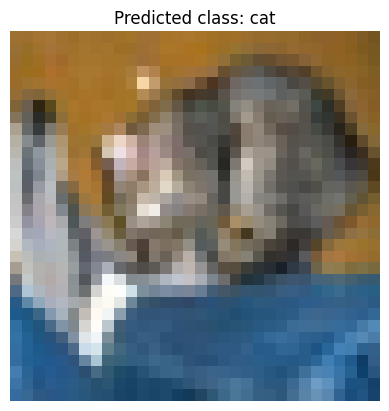

In [18]:
# Load the saved model
loaded_model = tf.keras.models.load_model('cnn_model.h5')

# Make predictions on a test image
import numpy as np

class_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

test_image = x_test[0]  # Replace with any test image
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Get the predicted class index
predicted_class_index = predicted_class[0]

# Map the predicted class index to the string label
predicted_class_label = class_labels[predicted_class_index]

predictions = loaded_model.predict(test_image)
predicted_class = np.argmax(predictions, axis=1)

print(f'Predicted class: {predicted_class}')
print(f'Predicted class label: {predicted_class_label}')
# You can visualize the image and the predicted class here.
import matplotlib.pyplot as plt

plt.imshow(x_test[0])
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')
plt.show()


# Using an example

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted class label: [0]
Predicted class label: airplane


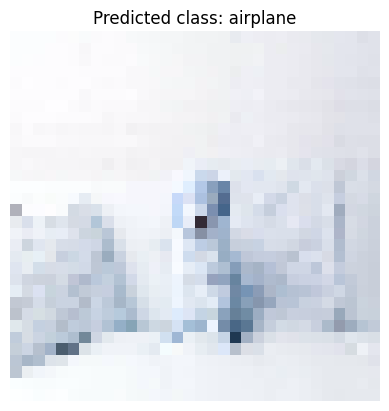

In [20]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('cnn_model.h5')

# Load an image
image_path = 'test.jpg'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (32, 32))  # Resize to match model input shape
image = image.astype('float32') / 255.0  # Normalize the image
image = img_to_array(image)
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Define the mapping of class indices
class_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Make a prediction
pred = model.predict(image)
class_label = np.argmax(pred, axis=1)

predicted_class_index2 = class_label[0]
predicted_class_label2 = class_labels[predicted_class_index2]

print(f'Predicted class label: {class_label}')
print(f'Predicted class label: {predicted_class_label2}')
# Fix: Remove the extra dimension using squeeze
img_array = np.asarray(image).squeeze(0)  # Remove the batch dimension (axis=0)

plt.imshow(img_array)
plt.title(f'Predicted class: {predicted_class_label2}')
plt.axis('off')
plt.show()